### *Assignment 2*: Group Recommendations
---

In [19]:
from group_recommendation import GroupRecommendation
from user_recommendation import UserRecommendation
from dataset import Dataset
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import operator


ratings_df = pd.read_csv(Dataset.get_dataset_path() + '/movielens-edu/ratings.csv')
ds = Dataset(ratings_df)

group_recommendation = GroupRecommendation(UserRecommendation(ds))

userGroup = [1, 9, 67, 99, 127, 456, 543, 276, 398]


**(a)** For producing group recommendation, we will use the user-based collaborative
filtering approach as this implemented in Assignment 1. Specifically, for producing group
recommendations, we will first compute the movies recommendations for each user in
the group, and then we will aggregate the lists of the individual users, so as to produce a
single list of movies for the group.

You will implement two well established aggregation methods for producing the group
recommendations.

The first aggregation approach is the average method. The main idea behind this
approach is that all members are considered equals. So, the rating of an item for a group
of users will be given be averaging the scores of an item across all group members.
The second aggregation method is the least misery method, where one member can act
as a veto for the rest of the group. In this case, the rating of an item for a group of users is
computed as the minimum score assigned to that item in all group members
recommendations.

Produce a group of 3 users, and for this group, show the top-10 recommendations, i.e.,
the 10 movies with the highest prediction scores that: 
1. the average method suggests,
2. the least misery method suggests. 


In [20]:
users_recommendations = group_recommendation.users_top_recommendations(userGroup)

aggregation = group_recommendation.aggregate_users_recommendations(users_recommendations)

pd.set_option('max_colwidth', None)
pd.DataFrame(aggregation.items(), columns=['movieId', 'predictions'])

,movieId,predictions
0,3200,"[5.21179632854418, 4.156204043103424, 4.29910394265233, 4.865596460366133, 4.169123201835547, 5.6728297575938, 6.159457889199786, 6.203339570880422, 4.56514688484927]"
1,137857,"[4.809343650070534, 4.083458146470907, 3.6125000000000003, 4.475967523112858, 3.302753424516153, 4.681539964079621, 6.529650492069143, 4.829339588954016, 5.845324158081524]"
2,143367,"[4.366379310344827, 5.5154150197628455, 3.9722222222222223, 3.8679245283018866, 5.368181818181818, 3.813953488372093, 4.453947368421052, 4.390243902439025, 4.25]"
3,2314,"[6.658141324074805, 3.7529162248144217, 6.263984235952199, 6.159686542031864, 3.6056830232333943, 5.0987644889454735, 4.945994028018083, 6.682005916169002, 6.5417620137299775]"
4,56715,"[4.366379310344827, 3.260869565217391, 4.101588858981323, 3.8679245283018866, 5.395759268664296, 3.813953488372093, 4.718063267380933, 4.925181964887079, 4.25]"
5,148881,"[4.366379310344827, 6.0154150197628455, 3.9722222222222223, 3.8679245283018866, 5.868181818181818, 3.813953488372093, 4.453947368421052, 4.390243902439025, 4.25]"
6,5522,"[5.2845207536665315, 4.795473154483661, 3.9609632662345047, 3.8679245283018866, 4.850054981079696, 5.9665822437369, 4.442688412433334, 5.25970723861939, 4.19988005809591]"
7,26258,"[5.628181693116018, 5.269388569149239, 4.213702261170615, 3.8679245283018866, 4.577181245384239, 3.813953488372093, 6.4624663723529, 6.398762906370873, 5.107351239782552]"
8,27156,"[5.654331063219807, 5.118819524862266, 3.9722222222222223, 5.725874487946761, 3.1136363636363638, 5.3482292209748525, 5.891037044190625, 5.7291910275500175, 4.25]"
9,106642,"[4.786669165417291, 4.699501353330577, 3.9722222222222223, 5.1946897171360416, 3.1136363636363638, 5.140718677206248, 5.556384841985612, 4.390243902439025, 6.82391304347826]"


In [21]:
avg_aggregation = group_recommendation.average_aggregation_from_users_recommendations(aggregation)
pd.DataFrame(avg_aggregation, columns=['movieId', 'avg predicition'])

,movieId,avg predicition
0,4021,5.598913
1,2314,5.523215
2,26326,5.282255
3,25947,5.282255
4,8477,5.221822
5,6591,5.208073
6,3379,5.181875
7,170355,5.181875
8,132333,5.139147
9,5490,5.139147


In [22]:
lm_aggregation = group_recommendation.least_misery_aggregation_from_users_recommendations(aggregation)
pd.DataFrame(lm_aggregation, columns=['movieId', 'min predicition'])

,movieId,min predicition
0,3200,4.156204
1,8477,3.972222
2,3266,3.972222
3,2138,3.972222
4,4021,3.955804
5,5522,3.867925
6,5915,3.867925
7,132333,3.867925
8,5490,3.867925
9,143367,3.813953


---

**(b)** The methods employed in part (a) of Assignment 2, do not consider any disagreements between the users in the group.
In part (b) of Assignment 2, define a way for counting the disagreements between the users in a group, and propose a method that takes disagreements into account when computing suggestions for the group.

Implement your method and explain why it is useful when producing group
recommendations.

Use again the group of 3 users, and for this group, show the top-10 recommendations,
i.e., the 10 movies with the highest prediction scores that your method suggests. Use the
MovieLens 100K rating dataset.

We decided to weight the reccomendations given by the average aggregation method.
It is a compromise between average and least misery aggregations, since the average method produces more overall satisfaction and the least misery decreases disagreement between users in the group.
We take into account the disagreement among users, calculating a weight that is 1 over the standard deviation of the predicted ratings, for each movie, then we multiply it by the average of ratings for that movie.

In [23]:
wavg_aggregation = group_recommendation.weighted_average_aggregation_from_users_recommendations(aggregation)
pd.DataFrame(wavg_aggregation, columns=['movieId', 'weighted avg predicition'])

,movieId,weighted avg predicition
0,2138,10.703989
1,168492,8.821418
2,3266,8.762949
3,8477,8.030752
4,112421,7.800313
5,143367,7.696225
6,156605,7.696225
7,5522,7.255965
8,56715,7.083579
9,4021,7.061394


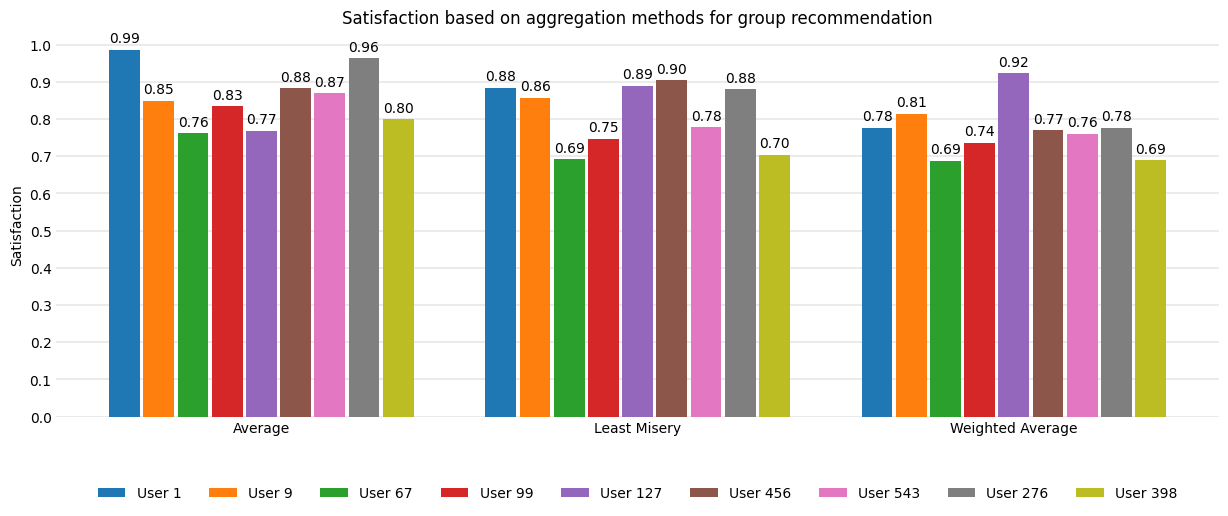

In [29]:
avg_group_rec, avg_user_satisfactions, avg_disagreements = group_recommendation.get_recommendations_satisfactions_and_disagreements_for_group(userGroup)
lm_group_rec, lm_user_satisfactions, lm_disagreements = group_recommendation.get_recommendations_satisfactions_and_disagreements_for_group(userGroup, group_recommendation.least_misery_aggregation_from_users_recommendations)
wavg_group_rec, wavg_user_satisfactions, wavg_disagreements = group_recommendation.get_recommendations_satisfactions_and_disagreements_for_group(userGroup, group_recommendation.weighted_average_aggregation_from_users_recommendations)


method_labels = ['Average', 'Least Misery', 'Weighted Average']

sats = {}
sats[method_labels[0]] = avg_user_satisfactions
sats[method_labels[1]] = lm_user_satisfactions
sats[method_labels[2]] = wavg_user_satisfactions

def prepare_data(data_dict):
    num_values = len(list(data_dict.values())[0])
    output = [list() for _ in range(num_values)]
    users = {}
    for key, value in data_dict.items():
        for i, (user, val) in enumerate(value):
            output[i].append(val)
            users[i] = user
    
    return output, users, num_values

def multiple_bar_plot(data_dict, bar_width, spacing):

    output, users, num_values = prepare_data(data_dict)
    num_methods = len(data_dict)

    if (spacing < bar_width * num_values):
        print("Spacing too small")
        return

    fig, ax = plt.subplots(figsize=(15, 5))
    xs = spacing * np.arange(num_methods)
    ax.grid(axis='y', linewidth=0.35, zorder=0)
    for i, v in enumerate(output):
        rect = ax.bar(xs - num_values * bar_width / 2 + bar_width / 2 + i * bar_width, v, bar_width * 0.9, label=f'User {users[i]}', zorder=3)
        ax.bar_label(rect, padding=3, fmt='{:,.2f}')

    ax.set(frame_on=False)
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_ylabel('Satisfaction')
    ax.set_title('Satisfaction based on aggregation methods for group recommendation')
    ax.set_xticks(xs)
    ax.set_xticklabels(method_labels)
    ax.set_yticks([i * 0.10 for i in range(0, 11)])

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(output), frameon=False)

multiple_bar_plot(sats, 0.1, 1.1)
plt.show()

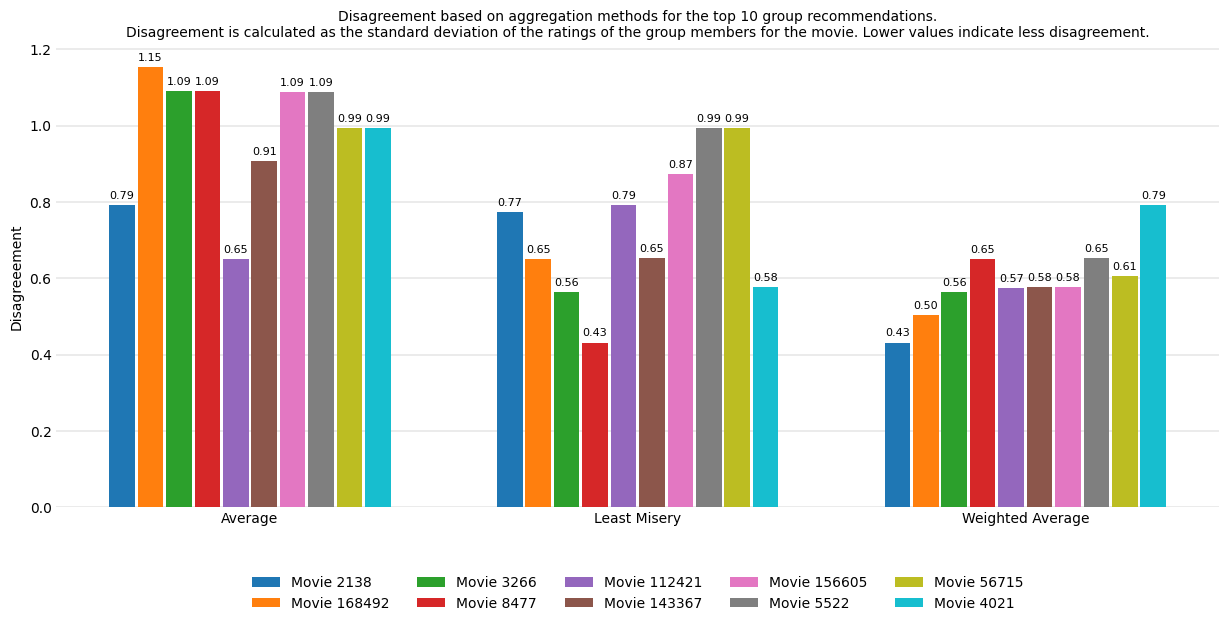

In [30]:
dis = {}
dis[method_labels[0]] = avg_disagreements
dis[method_labels[1]] = lm_disagreements
dis[method_labels[2]] = wavg_disagreements

def prepare_data(data_dict):
    num_values = len(list(data_dict.values())[0])
    output = [list() for _ in range(num_values)]
    movies = {}
    for key, value in data_dict.items():
        for i, (movie, val) in enumerate(value):
            output[i].append(val)
            movies[i] = movie
    
    return output, movies, num_values

def multiple_bar_plot(data_dict, bar_width, spacing):

    output, movies, num_values = prepare_data(data_dict)
    num_methods = len(data_dict)

    if (spacing < bar_width * num_values):
        print("Spacing too small")
        return

    fig, ax = plt.subplots(figsize=(15, 6))
    xs = spacing * np.arange(num_methods)
    ax.grid(axis='y', linewidth=0.35, zorder=0)
    for i, v in enumerate(output):
        rect = ax.bar(xs - num_values * bar_width / 2 + bar_width / 2 + i * bar_width, v, bar_width * 0.9, label=f'Movie {movies[i]}', zorder=3)
        ax.bar_label(rect, padding=3, fmt='{:,.2f}', fontsize=8)

    ax.set(frame_on=False)
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_ylabel('Disagreeement')
    ax.set_title('Disagreement based on aggregation methods for the top 10 group recommendations.\n' +
                 'Disagreement is calculated as the standard deviation of the ratings of the group members for the movie. Lower values indicate less disagreement.', fontsize=10)
    ax.set_xticks(xs)
    ax.set_xticklabels(method_labels)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5, frameon=False)

multiple_bar_plot(dis, 0.11, 1.5)
plt.show()

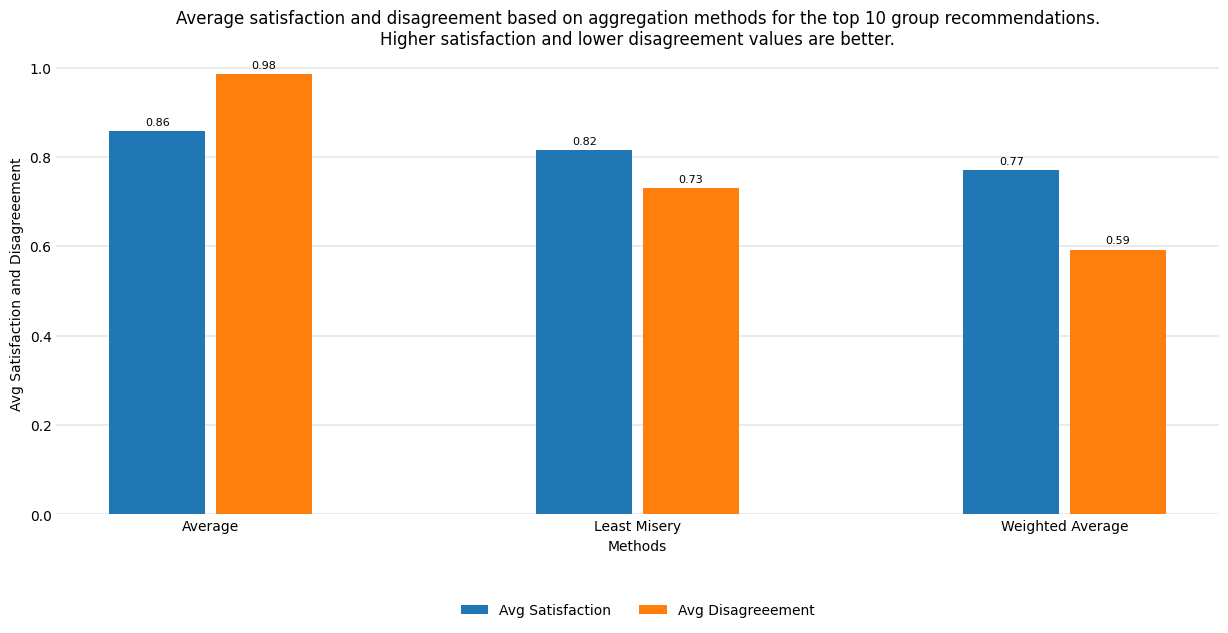

In [26]:
avg_of_disagreements = [
    np.mean([tup[1] for tup in avg_disagreements]),
    np.mean([tup[1] for tup in lm_disagreements]),
    np.mean([tup[1] for tup in wavg_disagreements])
]

avg_of_satisfactions = [
    np.mean([tup[1] for tup in avg_user_satisfactions]),
    np.mean([tup[1] for tup in lm_user_satisfactions]),
    np.mean([tup[1] for tup in wavg_user_satisfactions])
]

sat_dis_per_method = {}
sat_dis_per_method[method_labels[0]] = (avg_of_satisfactions[0], avg_of_disagreements[0])
sat_dis_per_method[method_labels[1]] = (avg_of_satisfactions[1], avg_of_disagreements[1])
sat_dis_per_method[method_labels[2]] = (avg_of_satisfactions[2], avg_of_disagreements[2])

def prepare_data(data_dict):
    num_values = len(list(data_dict.values())[0])
    output = [list() for _ in range(num_values)]
    sat_dis = {}
    for key, value in data_dict.items():
        for i, val in enumerate(value):
            output[i].append(val)
            sat_dis[i] = val
    
    return output, sat_dis, num_values

def multiple_bar_plot(data_dict, bar_width, spacing):

    output, _, num_values = prepare_data(data_dict)
    num_methods = len(data_dict)

    if (spacing < bar_width * num_values):
        print("Spacing too small")
        return

    fig, ax = plt.subplots(figsize=(15, 6))
    xs = spacing * np.arange(num_methods)
    ax.grid(axis='y', linewidth=0.35, zorder=0)
    for i, v in enumerate(output):
        label = 'Avg Satisfaction' if i == 0 else 'Avg Disagreeement'
        rect = ax.bar(xs - num_values * bar_width / 2 + bar_width / 2 + i * bar_width, v, bar_width * 0.9, label=label, zorder=3)
        ax.bar_label(rect, padding=3, fmt='{:,.2f}', fontsize=8)

    ax.set(frame_on=False)
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_ylabel('Avg Satisfaction and Disagreeement')
    ax.set_xlabel('Methods')
    ax.set_title('Average satisfaction and disagreement based on aggregation methods for the top 10 group recommendations.\n' +
                 'Higher satisfaction and lower disagreement values are better.')
    ax.set_xticks(xs)
    ax.set_xticklabels(method_labels)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5, frameon=False)

multiple_bar_plot(sat_dis_per_method, 0.25, 1)
plt.show()